In [1]:
# 1-2-0 引入需要的套件
import numpy as np
import pandas as pd

import tensorflow as tf

import keras
from keras.models import Sequential
from keras import layers, optimizers, datasets
#from keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical

In [2]:
# 1-2-1 匯入MNIST資料集
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# 查看資料的維度
print('x_train.shape:',x_train.shape,'y_train.shape:',y_train.shape)
print('x_test.shape:',x_test.shape,'y_test.shape:',y_test.shape)

x_train.shape: (60000, 28, 28) y_train.shape: (60000,)
x_test.shape: (10000, 28, 28) y_test.shape: (10000,)


In [3]:
# 把資料印出來查看
n_classes = 10
np.set_printoptions(linewidth=np.inf) # 設定 NumPy 打印時的行寬，使矩陣能完整顯示

print('x_train[0]:\n',x_train[0])
print('y_train[0] :',y_train[0])
print("="*120)
print('x_test[0]\n:',x_test[0])
print('y_test[0] :',y_test[0])

x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 2

In [4]:
# 1-2-2 資料前處理
# 正規化
x_train, x_test = x_train / 255.0, x_test / 255.0
#print('x_train[0]:\n',x_train[0])

# one-hot 編碼
y_train_onehot = to_categorical(y_train, n_classes)
y_test_onehot = to_categorical(y_test, n_classes)

print('y_train_onehot[0] :',y_train_onehot[0])
print('y_test_onehot[0] :',y_test_onehot[0])

print('x_train.shape :',x_train.shape,'y_train.shape :',y_train.shape,'y_train_onehot.shape :',y_train_onehot.shape) # 訓練
print('x_test.shape :',x_test.shape,'y_test.shape :',y_test.shape,'y_test_onehot.shape :',y_test_onehot.shape) # 測試

y_train_onehot[0] : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
y_test_onehot[0] : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
x_train.shape : (60000, 28, 28) y_train.shape : (60000,) y_train_onehot.shape : (60000, 10)
x_test.shape : (10000, 28, 28) y_test.shape : (10000,) y_test_onehot.shape : (10000, 10)


In [14]:
# 1-2-3 建立神經網路–使用Keras套件
# 建立模型 
model = tf.keras.models.Sequential([ # 宣告這是一個Sequential次序性的深度學習模型
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 指定input的維度
  tf.keras.layers.Dense(128, activation='relu'), # 加入一層hidden layer，和這層的活化函數
  tf.keras.layers.Dropout(0.2), # 以 0.2 的比例隨機丟棄一些神經元，防止過擬合
  tf.keras.layers.Dense(10, activation='softmax') # 加入output layer，和這層的活化函數
])

# 編譯模型
model.compile(optimizer='adam', # 選擇優化器
              loss='categorical_crossentropy', # 選擇損失函數
              metrics=['accuracy']) # 選擇評量準則
model.summary()

c:\Users\PARALELLED\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 1-2-4 訓練神經網路
# tensorflow中model.fit()的參數 # https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
history = model.fit(x_train, y_train_onehot, epochs=10) # (訓練樣本, 訓練標籤, 訓練五個週期)
model.evaluate(x_test, y_test_onehot) # Returns the loss value & metrics values for the model in test mode. # Scalar test loss

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step - accuracy: 0.9798 - loss: 0.0620
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - accuracy: 0.9819 - loss: 0.0577
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9814 - loss: 0.0541
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.9847 - loss: 0.0476
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.9865 - loss: 0.0435
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.9871 - loss: 0.0367
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.9882 - loss: 0.0352
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.9887 - loss: 0.0340
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 655us/step - accuracy: 0.9886 - loss: 0.0348
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.9898 - loss: 0.0291
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.9820 - loss: 0.1442


[0.12534700334072113, 0.9837999939918518]

In [15]:
# 1-2-5 查看loss與accuracy
loss_ce	= history.history.get('loss')
acc_ce 	= history.history.get('accuracy')
print('loss_ce :\t',loss_ce)
print('acc_ce :\t',acc_ce)

loss_ce :	 [0.0649779736995697, 0.05907255783677101, 0.054049424827098846, 0.04947768151760101, 0.04517339542508125, 0.03955608233809471, 0.037296175956726074, 0.035438597202301025, 0.035353027284145355, 0.03179847076535225]
acc_ce :	 [0.9795833230018616, 0.9807833433151245, 0.9816499948501587, 0.9839166402816772, 0.9854999780654907, 0.9864166378974915, 0.9877499938011169, 0.9879666566848755, 0.988016664981842, 0.9891999959945679]


In [8]:
# 1-3-1 設計一可協助判斷預測結果之函式 (混淆矩陣)
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
LABELS = ["0","1","2","3","4","5","6","7","8","9"]

def show_confusion_matrix(validations, predictions):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap="coolwarm",
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

In [9]:
#1-3-2 正式進行預測
y_test_onehot = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


Confusion matrix for testing data


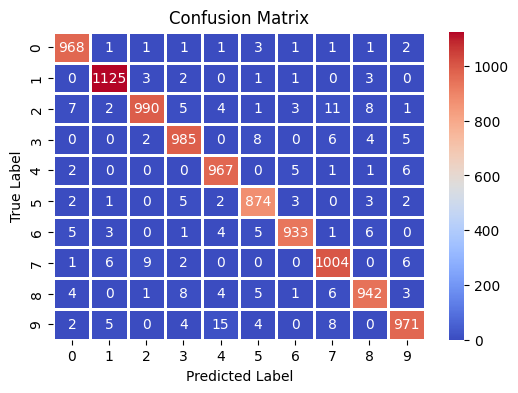

In [10]:
# 1-3-3 將結果以圖片呈現
print("Confusion matrix for testing data")
# 會返回最大值的索引（位置）。當使用 axis=1 時，它會在每一行（即每個子陣列）中選出最大值的索引。
max_y_pred_test = np.argmax(y_test_onehot, axis=1) 
#print(max_y_pred_test)
show_confusion_matrix(y_test, max_y_pred_test)

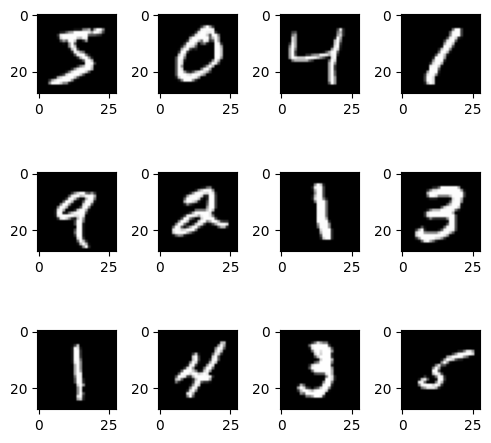

In [11]:
# 1-4 查看資料集
plt.figure(figsize=(5,5))

for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(x_train[k],cmap='gray')
plt.tight_layout()
plt.show()